Script para produção de gráficos voltados para análise e observação da simetria de distribuição dos dados:

Marcos Alexandre de Goes
N° USP 9817870

In [ ]:
# Importando bibliotecas:

import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from datetime import datetime
import scipy.stats as stats
import re
!pip install python-docx
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_BREAK

O script abaixo permite armazenar os caminhos dos diretorios de cada planilha e assim armazenar em uma lista, facilitando a abertura dos arquivos csv posteriormente

In [ ]:
#Salvando os nomes dos diretórios de cada arquivo em uma variável:

path = r'/content/drive/Shareddrives/PUB_Meteorologia/Dados_horarios_Tmin_Tmax' # insira o diretorio no drive onde seus arquivos se encontram
files=os.listdir(path)
files_xlsx = [path + "/"+ f for f in files if f[-3:] == 'csv']

Foi criado uma função onde o loop while percorrerá as colunas de interesse e realizará um conjunto de três gráficos em um único plot.

In [ ]:
# Definindo função para gerar gráficos boxplot, histograma e Q-Q plot:

def graficos(df):
 contar=2
 coluna=df.columns.tolist()

 while contar < 8:
  plt.figure(figsize=(12,4))

  k=coluna[contar]
  plt.subplot(1,3,1)
  plt.hist(df[k],bins=30)
  plt.title(f'Histograma   -  {k} Estação {j[0]}')

  plt.subplot(1,3,2)
  stats.probplot(df[k],
  dist='norm',plot=plt)
  plt.ylabel('quantiles')

  plt.subplot(1,3,3)
  sns.boxplot(y=df[k])
  plt.title(f'Boxplot  - {k} Estação {j[0]}')
  plt.subplots_adjust(left=0.3,
                    bottom=0.5,
                    right=1.5,
                    top=1.2,
                    wspace=0.3,
                    hspace=0.3)
  plt.show()
  plt.savefig(f"Planiha_{planilha+1}_Plotagem{contar-1}.png",bbox_inches='tight',format="png")
  contar=contar+1
  plt.pause(1)

Ajustar a data com a biblioteca "datetime", facilita a manipulação e visualização das datas, atribuindo o nome de cada mês em uma coluna separada:

In [ ]:
 # Ajustando as datas da planilha para colunas separadas de dia, mês e ano:

 def configurando_data(df):
  df['Data Medicao'] = df['Data Medicao'].apply(pd.to_datetime)
  df['ANO'] = df['Data Medicao'].dt.year
  df['MES'] = df['Data Medicao'].dt.month
  df['DIA'] = df['Data Medicao'].dt.day
  df.loc[df.MES == 1,'MES']='Jan'
  df.loc[df.MES == 2,'MES']='Fev'
  df.loc[df.MES == 3,'MES']='Mar'
  df.loc[df.MES == 4,'MES']='Abr'
  df.loc[df.MES == 5,'MES']='Mai'
  df.loc[df.MES == 6,'MES']='Jun'
  df.loc[df.MES == 7,'MES']='Jul'
  df.loc[df.MES == 8,'MES']='Ago'
  df.loc[df.MES == 9,'MES']='Set'
  df.loc[df.MES == 10,'MES']='Out'
  df.loc[df.MES == 11,'MES']='Nov'
  df.loc[df.MES == 12,'MES']='Dez'

O valor de planilha é o index da lista de diretórios 'files_xlsx', ou seja varia de 0 até 14 pois são 15 documentos csv na pasta, o valor escolhido seleciona a planilha a ser executada segundo a ordem em que aparecem na pasta:

In [ ]:
# Os códigos a seguir realizam uma série de operações como abertura da planilha csv, remoção de uma coluna vazia e de linhas com valores nulos:

planilha=0
df_horario=pd.read_csv(files_xlsx[planilha], skiprows = range(0, 10),sep=";",decimal = ',', dtype = {'PRECIPITACAO TOTAL, HORARIO(mm)':np.float64,'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)': np.float64})
df_horario=df_horario.drop("Unnamed: 8", axis=1)
df_horario=df_horario.dropna()
min=files[planilha]
j=re.findall("A\d{3}",min)

In [ ]:
# A data será filtrada de acordo com o ano iniciando em 01-Jan-2008:
configurando_data(df_horario)
df_horario=df_horario[df_horario["ANO"] > 2007]

As colunas recebem nomes menores, a radiação é convertida para Megajoule, padrão para cálculo de ETo:

In [ ]:
# Renomeando os nomes das colunas para ficar mais compacto e de fácil manipulação:
df_horario=df_horario.rename(columns={"PRECIPITACAO TOTAL, HORARIO(mm)":'Prec(mm)',"TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)":'TMax',"TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C)":"TMin","UMIDADE RELATIVA DO AR, HORARIA(%)":'UR(%)',"VENTO, VELOCIDADE HORARIA(m/s)":'U2(m/s)',"RADIACAO GLOBAL(Kj/m²)":'RAD(MJ/m²)'})

#Transformando radiação de kilojoule para megajoule:
df_horario["RAD(MJ/m²)"]=df_horario["RAD(MJ/m²)"]/1000

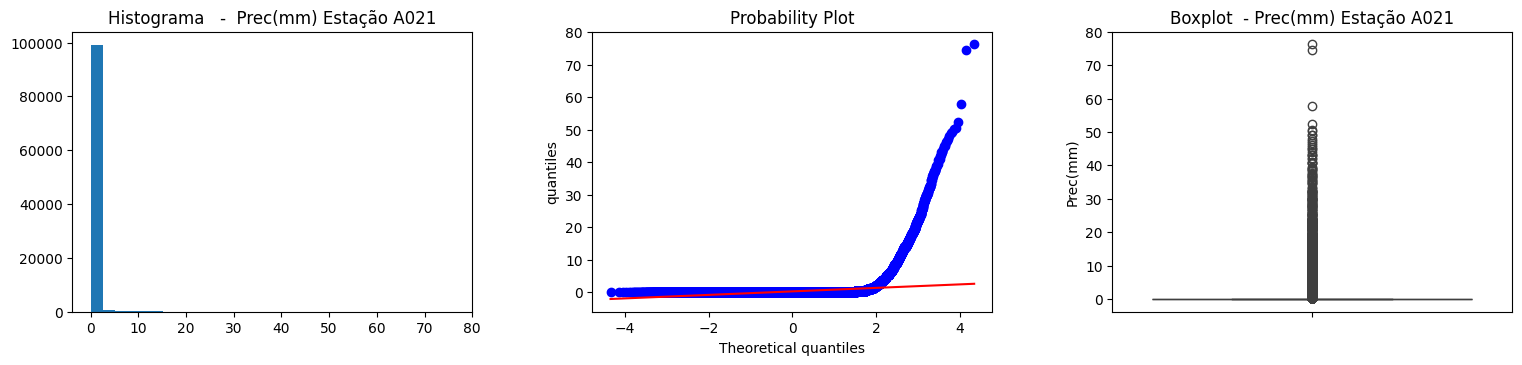

<Figure size 640x480 with 0 Axes>

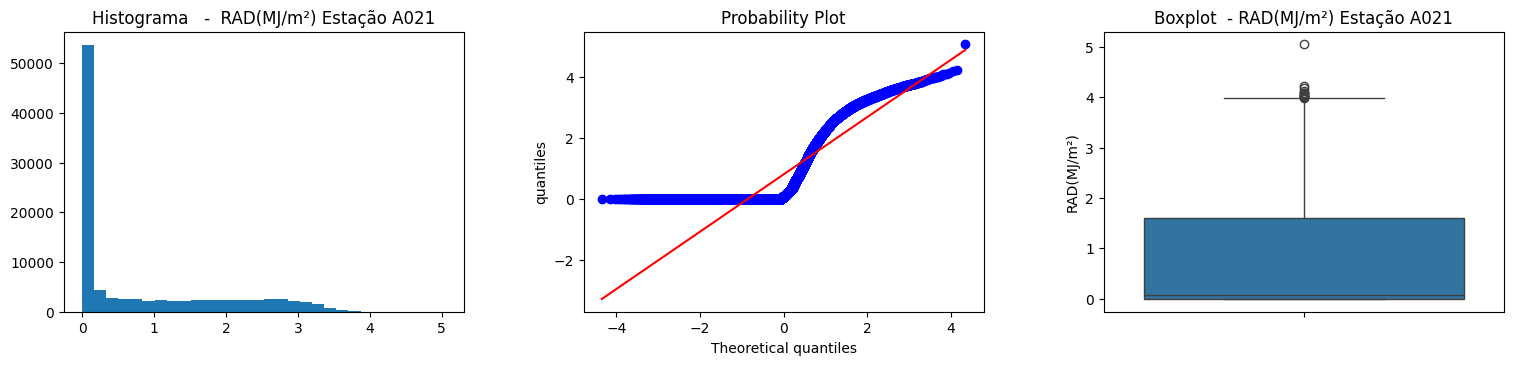

<Figure size 640x480 with 0 Axes>

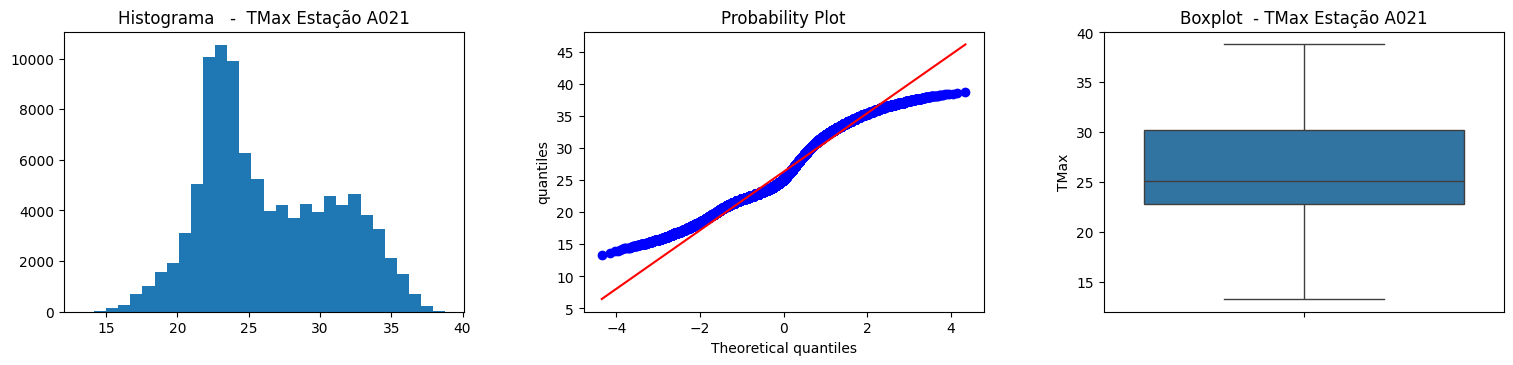

<Figure size 640x480 with 0 Axes>

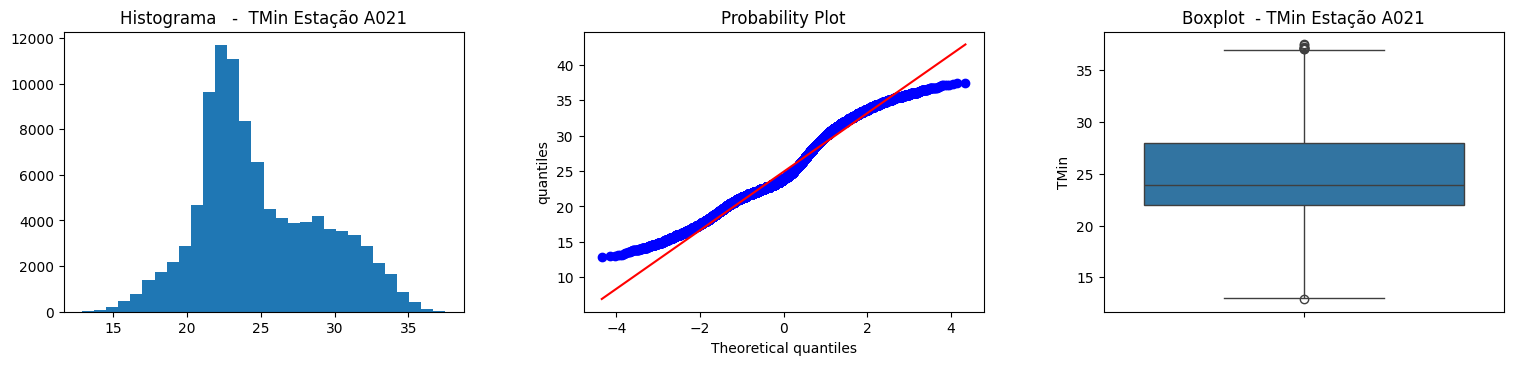

<Figure size 640x480 with 0 Axes>

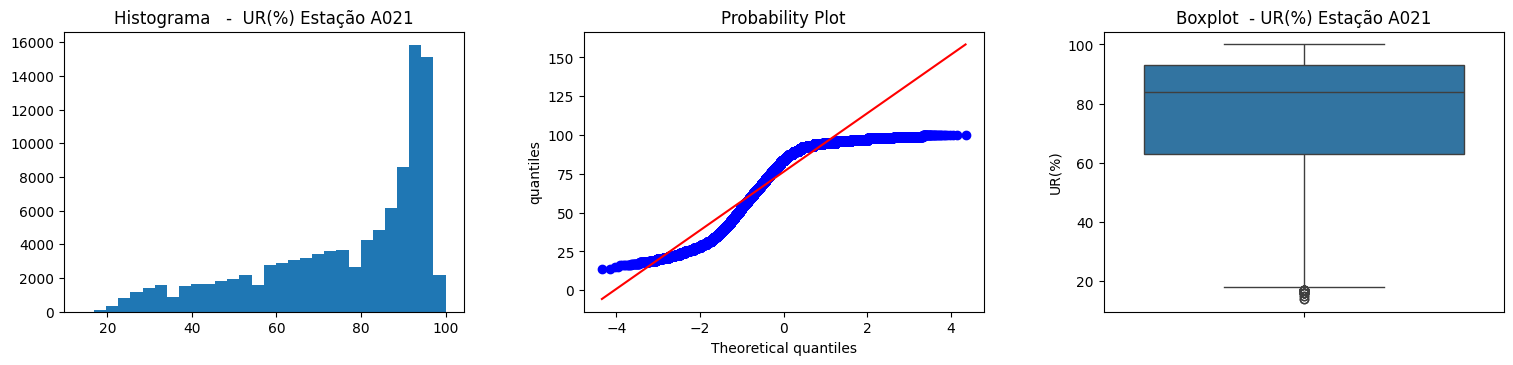

<Figure size 640x480 with 0 Axes>

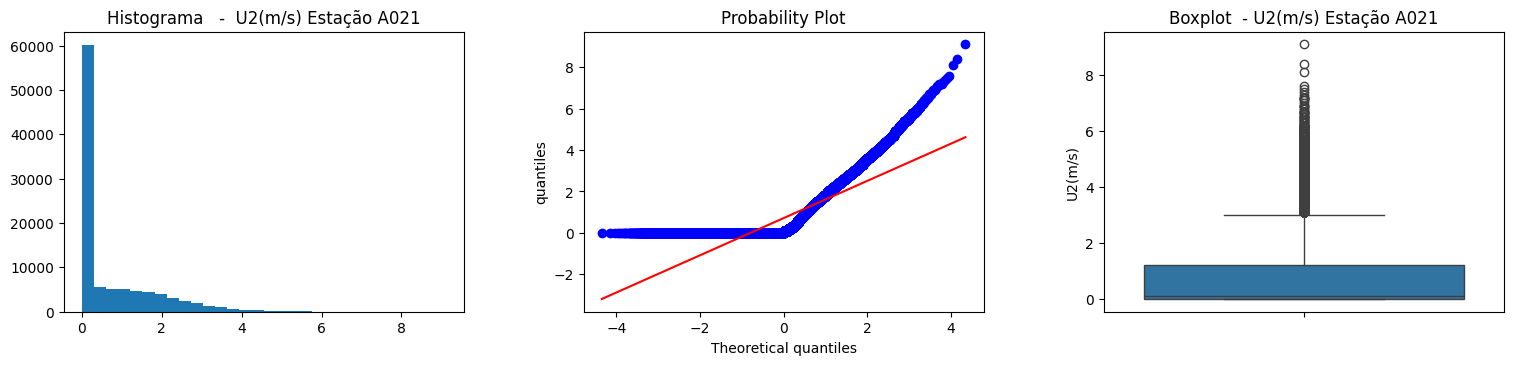

<Figure size 640x480 with 0 Axes>

In [ ]:
# Aplicando a função de  criação de gráficos:

graficos(df_horario)

Salvando os graficos baixados em png para um documento em word:

In [ ]:
contar=0

# Crie um novo documento

documento = Document()
path = r'/content'  # Insira o diretório no drive onde seus arquivos se encontram;
file_png=os.listdir(path)   # Criando uma variável com os nomes dos arquivos png ;
file_png = [path + "/"+ f for f in file_png if f[-3:] == 'png']   # Extrai os arquivos da lista anterior e insere o diretório criando o caminho completo;
file_png.sort()   # Ordena os dados para os gráficos serem inseridos em uma ordem corerente no word;

# Insira a quantidade de imagens no loop while;

while contar < 6:



  plt.pause(1)  # a pausa previne que o último gráfico seja ignorado no loop
  documento.add_paragraph()   # Parágrafo evitam que os gráficos sejam inseridos um em cima do outro no word;
  documento.add_paragraph().add_run().add_picture(file_png[contar], width=Inches(6.3))  # defina o tamanho  horizontal do grafico

  contar=contar+1

documento.save('documento_com_imagem_novo.docx')  # Salvando o documento